# <center> <b> Models evalute <center> </b>

## <center> <b> Data prepare </b></center> <br>

In [1]:
import numpy as np
import librosa.display
import os
import matplotlib.pyplot as plt
# !uv pip install soundfile
def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)
    
def create_pngs_from_mp3(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.mp3', '.png'))
        print(input_file, output_file)
        create_spectrogram(input_file, output_file)

In [2]:
# import keras.utils as image
from keras.preprocessing import image

def load_images_from_path(path, label, method='direct'):
    images = []
    labels = []
    if method == 'direct':
        for file in os.listdir(path):
            # if file.startswith('converted_'):
            images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
            labels.append((label))
    else:
        images.append(image.img_to_array(image.load_img(f'{path}.png' , target_size=(224, 224, 3))))
        labels.append((label))

    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 11, figsize=(10, 10), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
        
x = []
y = []

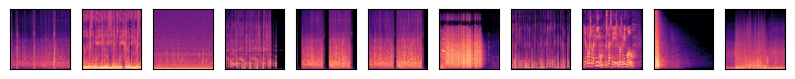

In [3]:
from tensorflow.keras.utils import to_categorical
images, labels = load_images_from_path('Spectrograms/samples', 0)
show_images(images)
    
x += images

y = ['Выстрелы', 'Другие', 'Другие', 'Другие', 'Выстрелы', 'Выстрелы', 'Выстрелы', 'Другие', 'Другие', 'Выстрелы', 'Фейерверки']
y_encoded = [0 if item == 'Выстрелы' else 1 if item == 'Фейерверки' else 2 for item in y]
y_encoded = to_categorical(y_encoded)

## <center> <b> Models </b></center> <br>


### <center> <b> MobieNet models </b></center> <br>

#### <center> <b> MobieNetV2 </b></center> <br>

In [4]:
from tensorflow.keras.applications import MobileNetV2 # type: ignore
from tensorflow.keras.applications.mobilenet import preprocess_input # type: ignore

MobileNetV2_baseline = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [5]:
import tensorflow as tf
MobileNetV2_finetuned = tf.keras.models.load_model(r'models\best_MobileNetV2')

In [6]:
x_norm = preprocess_input(np.array(x))

x_features = MobileNetV2_baseline.predict(x_norm)
predict_MobileNetV2 = MobileNetV2_finetuned.predict(x_features)
predict_MobileNetV2 = (predict_MobileNetV2 > 0.5).astype(int)

In [7]:
from sklearn.metrics import precision_score , recall_score , f1_score
precision_MobileNetV2 = precision_score(y_encoded, predict_MobileNetV2, average=None)

recall_MobileNetV2 = recall_score(y_encoded, predict_MobileNetV2, average=None)

f1_score_MobileNetV2 = f1_score(y_encoded, predict_MobileNetV2, average=None)

c:\anaconda3\envs\protect_of_terrorist_attacks\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### <center> <b> MobieNetV3 </b></center> <br>

In [8]:
from tensorflow.keras.applications import MobileNetV3Large # type: ignore
from tensorflow.keras.applications.mobilenet import preprocess_input # type: ignore

MobileNetV3_baseline = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [9]:
# import tensorflow as tf
# MobileNetV3_finetuned = tf.keras.models.load_model(r'models\MobileNetV3Large_finetuned')

In [10]:
import tensorflow_addons as tfa
MobileNetV3_finetuned = tf.keras.models.load_model(
    r'models\MobileNetV3Large_finetuned',
    custom_objects={'F1Score': tfa.metrics.F1Score}  # Example using tfa.metrics.F1Score
)

c:\anaconda3\envs\protect_of_terrorist_attacks\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\anaconda3\envs\protect_of_terrorist_attacks\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not

In [11]:
x_norm = preprocess_input(np.array(x))

x_features = MobileNetV3_baseline.predict(x_norm)
predict_MobileNetV3 = MobileNetV3_finetuned.predict(x_features)
predict_MobileNetV3 = (predict_MobileNetV3 > 0.5).astype(int)

In [12]:
from sklearn.metrics import precision_score , recall_score , f1_score
precision_MobileNetV3 = precision_score(y_encoded, predict_MobileNetV3, average=None)

recall_MobileNetV3 = recall_score(y_encoded, predict_MobileNetV3, average=None)

f1_score_MobileNetV3 = f1_score(y_encoded, predict_MobileNetV3, average=None)

c:\anaconda3\envs\protect_of_terrorist_attacks\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### <center> <b> CNN models </b></center> <br>

#### <center> <b> CNN without BatchNormalization <center> </b>

In [14]:
import tensorflow as tf
CNN_without_BatchNormalization = tf.keras.models.load_model(r'models\CNN_without_BatchNormalization')

In [15]:
predict_CNN_without_BatchNormalization  = CNN_without_BatchNormalization .predict(np.array(x))
predict_CNN_without_BatchNormalization = (predict_CNN_without_BatchNormalization > 0.5).astype(int)

In [16]:
from sklearn.metrics import precision_score , recall_score , f1_score
precision_CNN_without_BatchNormalization  = precision_score(y_encoded, predict_CNN_without_BatchNormalization, average=None)

recall_CNN_without_BatchNormalization  = recall_score(y_encoded, predict_CNN_without_BatchNormalization, average=None)

f1_score_CNN_without_BatchNormalization  = f1_score(y_encoded, predict_CNN_without_BatchNormalization, average=None)

c:\anaconda3\envs\protect_of_terrorist_attacks\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### <center> <b> CNN with BatchNormalization </b></center> <br>

In [108]:
import tensorflow as tf
CNN_BatchNormalization = tf.keras.models.load_model(r'models\CNN_with_BatchNormalization(best2)')

In [109]:
# predict_CNN_BatchNormalization = CNN_BatchNormalization.predict(np.array(x))
predict_CNN_BatchNormalization = CNN_BatchNormalization.predict(np.array(x) / 255)
predict_CNN_BatchNormalization = (predict_CNN_BatchNormalization > 0.5).astype(int)

In [110]:
from sklearn.metrics import precision_score , recall_score , f1_score
precision_CNN_BatchNormalization = precision_score(y_encoded, predict_CNN_BatchNormalization, average=None)

recall_CNN_BatchNormalization = recall_score(y_encoded, predict_CNN_BatchNormalization, average=None)

f1_score_CNN_BatchNormalization = f1_score(y_encoded, predict_CNN_BatchNormalization, average=None)

#### <center> <b> CNN + LSTM with BatchNormalization <center> </b>

In [20]:
import tensorflow as tf
CNN_P_LSTM_with_BatchNormalization = tf.keras.models.load_model(r'models\CNN_P_LSTM_with_BatchNormalization')

In [21]:
predict_CNN_P_LSTM_with_BatchNormalization = CNN_P_LSTM_with_BatchNormalization.predict(np.array(x))
predict_CNN_P_LSTM_with_BatchNormalization = (predict_CNN_P_LSTM_with_BatchNormalization > 0.5).astype(int)

In [22]:
from sklearn.metrics import precision_score , recall_score , f1_score
precision_CNN_P_LSTM_with_BatchNormalization = precision_score(y_encoded, predict_CNN_P_LSTM_with_BatchNormalization, average=None)

recall_CNN_P_LSTM_with_BatchNormalization = recall_score(y_encoded, predict_CNN_P_LSTM_with_BatchNormalization, average=None)

f1_score_CNN_P_LSTM_with_BatchNormalization = f1_score(y_encoded, predict_CNN_P_LSTM_with_BatchNormalization, average=None)

c:\anaconda3\envs\protect_of_terrorist_attacks\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### <center> <b> One Class Classification model </b></center> <br>

#### <center> <b> SVM + ResNET50 для извлечения признаков </b></center> <br>

In [23]:
import pickle
from sklearn import svm

filename = 'svm_model.pkl'
with open(filename, 'rb') as file:
    oc_svm_clf = pickle.load(file)

In [24]:
import pandas as pd
test = pd.read_csv("final_features_test.csv")
oc_svm_preds = oc_svm_clf.predict(test)

In [25]:
from sklearn.metrics import precision_score , recall_score , f1_score
precision_oc_svm_clf = precision_score([1 if item == 'Выстрелы' else -1 for item in y], oc_svm_preds, average=None)

recall_oc_svm_clf = recall_score([1 if item == 'Выстрелы' else -1 for item in y], oc_svm_preds, average=None)

f1_score_oc_svm_clf = f1_score([1 if item == 'Выстрелы' else -1 for item in y], oc_svm_preds, average=None)

#### <center> <b> AutoEncoder </b></center> <br>

In [26]:
import tensorflow as tf
autoencoder = tf.keras.models.load_model(r'models\autoencoder')

In [27]:
threshold = 0.017881708685308674

predictions = autoencoder.predict(np.array(x) / 255)
test_errors = np.mean(np.square(np.array(x) / 255 - predictions), axis=1)
anomalies = test_errors > threshold
np.count_nonzero(anomalies[2]) > 0.05 * anomalies[0].size
# predict_CNN_without_BatchNormalization = (predict_CNN_without_BatchNormalization > 0.5).astype(int)

False

In [28]:
from sklearn.metrics import precision_score , recall_score , f1_score
precision_autoencoder = precision_score([True if item == 'Выстрелы' else False for item in y], [np.count_nonzero(anomalies[i]) > 0.06 * anomalies[0].size for i in range(11)], average=None)

recall_autoencoder = recall_score([1 if item == 'Выстрелы' else -1 for item in y], [np.count_nonzero(anomalies[i]) > 0.06 * anomalies[0].size for i in range(11)], average=None)

f1_score_autoencoder = f1_score([1 if item == 'Выстрелы' else -1 for item in y], [np.count_nonzero(anomalies[i]) > 0.06 * anomalies[0].size for i in range(11)], average=None)

c:\anaconda3\envs\protect_of_terrorist_attacks\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### <center> <b> YAMNet </b></center> <br>

In [29]:
reloaded_model = tf.saved_model.load('models/yamnet_funetened')

In [30]:
import tensorflow as tf
import tensorflow_io as tfio

@tf.function
def load_audio_16k_mono(filename):
    try:
        audio = tfio.audio.decode_mp3(tf.io.read_file(filename))

        sample_rate = tf.cast(44100, dtype=tf.int64) # Default MP3 sample rate. Might not always be true!

        audio = tfio.audio.resample(audio, rate_in=sample_rate, rate_out=16000)
        # Ensure the audio is float32 and normalized to [-1, 1]
        # audio = tf.cast(audio, tf.float32) / 32768.0

        audio = tf.reduce_mean(audio, axis=1, keepdims=True)
        audio = tf.reshape(audio, [-1]) 
    except:
        audio = None
    return audio

In [31]:
testing_wav_data = []
for i in os.listdir(r'Sounds/samples'):
    testing_wav_data.append(load_audio_16k_mono(fr'Sounds/samples/{i}'))

In [32]:
classes_YAMNet = []
for i in range(11):
    reloaded_results = reloaded_model(testing_wav_data[0])
    my_classes = [0, 1, 2]
    classes_YAMNet.append(my_classes[tf.math.argmax(reloaded_results)])

In [33]:
from sklearn.metrics import precision_score , recall_score , f1_score
precision_YAMNet = precision_score(classes_YAMNet, [0 if item == 'Выстрелы' else 1 if item == 'Фейерверки' else 2 for item in y], average=None)

recall_YAMNet = recall_score(classes_YAMNet, [0 if item == 'Выстрелы' else 1 if item == 'Фейерверки' else 2 for item in y], average=None)

f1_score_YAMNet = f1_score(classes_YAMNet, [0 if item == 'Выстрелы' else 1 if item == 'Фейерверки' else 2 for item in y], average=None)

c:\anaconda3\envs\protect_of_terrorist_attacks\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## <center> <b> Evalute </b></center> <br>

In [ ]:
import pandas as pd
import dataframe_image as dfi
from statistics import mean
from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list('mycmap', ['#ffffff', '#6f9e2c'])

scores = []


all_f1 = {'f1_score_MobileNetV2' : (f1_score_MobileNetV2),
        'f1_score_MobileNetV3' : (f1_score_MobileNetV3),
        'f1_score_CNN_without_BatchNormalization' : (f1_score_CNN_without_BatchNormalization), 
        'f1_score_CNN_BatchNormalization' : (f1_score_CNN_BatchNormalization),
        'f1_score_CNN_P_LSTM_with_BatchNormalization' : (f1_score_CNN_P_LSTM_with_BatchNormalization),
        'f1_score_oc_svm_clf' : (f1_score_oc_svm_clf),
        'f1_score_autoencoder' : (f1_score_autoencoder),
        'f1_score_YAMNet' : (f1_score_YAMNet)}

row1 = {
        "Metric": "F1 avg",
        "MobileNetV2": mean(all_f1['f1_score_MobileNetV2']),
        "MobileNetV3": mean(all_f1['f1_score_MobileNetV3']),
        "CNN без BatchNormalization": mean(all_f1['f1_score_CNN_without_BatchNormalization']),
        "CNN c BatchNormalization": mean(all_f1['f1_score_CNN_BatchNormalization']),
        "CNN + LSTM c BatchNormalization": mean(all_f1['f1_score_CNN_P_LSTM_with_BatchNormalization']),
        "One class SVM": mean(all_f1['f1_score_oc_svm_clf']),
        "Autoencoder": mean(all_f1['f1_score_autoencoder']),
        "YAMNet": mean(all_f1['f1_score_YAMNet']),
    }

row = {
        "Metric": "F1 min",
        "MobileNetV2": min(all_f1['f1_score_MobileNetV2']),
        "MobileNetV3": min(all_f1['f1_score_MobileNetV3']),
        "CNN без BatchNormalization": min(all_f1['f1_score_CNN_without_BatchNormalization']),
        "CNN c BatchNormalization": min(all_f1['f1_score_CNN_BatchNormalization']),
        "CNN + LSTM c BatchNormalization": min(all_f1['f1_score_CNN_P_LSTM_with_BatchNormalization']),
        "One class SVM": min(all_f1['f1_score_oc_svm_clf']),
        "Autoencoder": min(all_f1['f1_score_autoencoder']),
        "YAMNet": min(all_f1['f1_score_YAMNet'])
    }

row2 = {
        "Metric": "F1 max",
        "MobileNetV2": max(all_f1['f1_score_MobileNetV2']),
        "MobileNetV3": max(all_f1['f1_score_MobileNetV3']),
        "CNN без BatchNormalization": max(all_f1['f1_score_CNN_without_BatchNormalization']),
        "CNN c BatchNormalization": max(all_f1['f1_score_CNN_BatchNormalization']),
        "CNN + LSTM c BatchNormalization": max(all_f1['f1_score_CNN_P_LSTM_with_BatchNormalization']),
        "One class SVM": max(all_f1['f1_score_oc_svm_clf']),
        "Autoencoder": max(all_f1['f1_score_autoencoder']),
        "YAMNet": max(all_f1['f1_score_YAMNet'])
    }

scores.append(row)
scores.append(row1)
scores.append(row2)

def highlight_max(s):
    is_max = s == s.max()
    return ["background-color: lightgreen" if v else "background-color: white" for v in is_max]


f1_scores = (
    pd.DataFrame(scores)
    .set_index("Metric")
    # .style.apply(highlight_max, axis=1)
)
f1_scores =f1_scores.style.background_gradient(axis=1, cmap=cmap, low=0.02, high = 0.7)
dfi.export(f1_scores, 'f1_scores.png')

In [ ]:
import pandas as pd
import dataframe_image as dfi
from statistics import mean

scores = []


all_precision = {'precision_MobileNetV2' : (precision_MobileNetV2),
        'precision_MobileNetV3' : (precision_MobileNetV3),
        'precision_CNN_without_BatchNormalization' : (precision_CNN_without_BatchNormalization), 
        'precision_CNN_BatchNormalization' : (precision_CNN_BatchNormalization),
        'precision_CNN_P_LSTM_with_BatchNormalization' : (precision_CNN_P_LSTM_with_BatchNormalization),
        'precision_oc_svm_clf' : (precision_oc_svm_clf),
        'precision_autoencoder' : (precision_autoencoder),
        'precision_YAMNet' : (precision_YAMNet)
        }

row = {
        "Metric": "F1 avg",
        "MobileNetV2": mean(all_precision['precision_MobileNetV2']),
        "MobileNetV3": mean(all_precision['precision_MobileNetV3']),
        "CNN без BatchNormalization": mean(all_precision['precision_CNN_without_BatchNormalization']),
        "CNN c BatchNormalization": mean(all_precision['precision_CNN_BatchNormalization']),
        "CNN + LSTM c BatchNormalization": mean(all_precision['precision_CNN_P_LSTM_with_BatchNormalization']),
        "One class SVM": mean(all_precision['precision_oc_svm_clf']),
        "Autoencoder": mean(all_precision['precision_autoencoder']),
        "YAMNet": mean(all_precision['precision_YAMNet']),
    }

row1 = {
        "Metric": "F1 min",
        "MobileNetV2": min(all_precision['precision_MobileNetV2']),
        "MobileNetV3": min(all_precision['precision_MobileNetV3']),
        "CNN без BatchNormalization": min(all_precision['precision_CNN_without_BatchNormalization']),
        "CNN c BatchNormalization": min(all_precision['precision_CNN_BatchNormalization']),
        "CNN + LSTM c BatchNormalization": min(all_precision['precision_CNN_P_LSTM_with_BatchNormalization']),
        "One class SVM": min(all_precision['precision_oc_svm_clf']),
        "Autoencoder": min(all_precision['precision_autoencoder']),
        "YAMNet": min(all_precision['precision_YAMNet']),
    }

row2 = {
        "Metric": "F1 max",
        "MobileNetV2": max(all_precision['precision_MobileNetV2']),
        "MobileNetV3": max(all_precision['precision_MobileNetV3']),
        "CNN без BatchNormalization": max(all_precision['precision_CNN_without_BatchNormalization']),
        "CNN c BatchNormalization": max(all_precision['precision_CNN_BatchNormalization']),
        "CNN + LSTM c BatchNormalization": max(all_precision['precision_CNN_P_LSTM_with_BatchNormalization']),
        "One class SVM": max(all_precision['precision_oc_svm_clf']),
        "Autoencoder": max(all_precision['precision_autoencoder']),
        "YAMNet": max(all_precision['precision_YAMNet']),
    }

scores.append(row)
scores.append(row1)
scores.append(row2)

def highlight_max(s):
    is_max = s == s.max()
    return ["background-color: lightgreen" if v else "background-color: white" for v in is_max]


precision_scores = (
    pd.DataFrame(scores)
    .set_index("Metric")
    .style.apply(highlight_max, axis=1)
)

dfi.export(precision_scores, 'precision_scores.png')

In [ ]:
import pandas as pd
import dataframe_image as dfi
from statistics import mean

scores = []


all_recall = {'recall_MobileNetV2' : (recall_MobileNetV2),
        'recall_MobileNetV3' : (recall_MobileNetV3),
        'recall_CNN_without_BatchNormalization' : (recall_CNN_without_BatchNormalization), 
        'recall_CNN_BatchNormalization' : (recall_CNN_BatchNormalization),
        'recall_CNN_P_LSTM_with_BatchNormalization' : (recall_CNN_P_LSTM_with_BatchNormalization),
        'recall_oc_svm_clf' : (recall_oc_svm_clf),
        'recall_autoencoder' : (recall_autoencoder),
        'recall_YAMNet' : (recall_YAMNet),
        }

row = {
        "Metric": "F1 avg",
        "MobileNetV2": mean(all_recall['recall_MobileNetV2']),
        "MobileNetV3": mean(all_recall['recall_MobileNetV3']),
        "CNN без BatchNormalization": mean(all_recall['recall_CNN_without_BatchNormalization']),
        "CNN c BatchNormalization": mean(all_recall['recall_CNN_BatchNormalization']),
        "CNN + LSTM c BatchNormalization": mean(all_recall['recall_CNN_P_LSTM_with_BatchNormalization']),
        "One class SVM": mean(all_recall['recall_oc_svm_clf']),
        "Autoencoder": mean(all_recall['recall_autoencoder']),
        "YAMNet": mean(all_recall['recall_YAMNet']),
    }

row1 = {
        "Metric": "F1 min",
        "MobileNetV2": min(all_recall['recall_MobileNetV2']),
        "MobileNetV3": min(all_recall['recall_MobileNetV3']),
        "CNN без BatchNormalization": min(all_recall['recall_CNN_without_BatchNormalization']),
        "CNN c BatchNormalization": min(all_recall['recall_CNN_BatchNormalization']),
        "CNN + LSTM c BatchNormalization": min(all_recall['recall_CNN_P_LSTM_with_BatchNormalization']),
        "One class SVM": min(all_recall['recall_oc_svm_clf']),
        "Autoencoder": min(all_recall['recall_autoencoder']),
        "YAMNet": min(all_recall['recall_YAMNet']),
    }

row2 = {
        "Metric": "F1 max",
        "MobileNetV2": max(all_recall['recall_MobileNetV2']),
        "MobileNetV3": max(all_recall['recall_MobileNetV3']),
        "CNN без BatchNormalization": max(all_recall['recall_CNN_without_BatchNormalization']),
        "CNN c BatchNormalization": max(all_recall['recall_CNN_BatchNormalization']),
        "CNN + LSTM c BatchNormalization": max(all_recall['recall_CNN_P_LSTM_with_BatchNormalization']),
        "One class SVM": max(all_recall['recall_oc_svm_clf']),
        "Autoencoder": max(all_recall['recall_autoencoder']),
        "YAMNet": max(all_recall['recall_YAMNet']),
    }

scores.append(row)
scores.append(row1)
scores.append(row2)

def highlight_max(s):
    is_max = s == s.max()
    return ["background-color: lightgreen" if v else "background-color: white" for v in is_max]


recall_scores = (
    pd.DataFrame(scores)
    .set_index("Metric")
    .style.apply(highlight_max, axis=1)
)

dfi.export(recall_scores, 'recall_scores.png')